In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots
plt.style.use(["science","bright","grid"])

In [17]:
freq_vals   = [0.001,0.002,0.004,0.006,0.008,0.01,0.03,0.06,0.12,0.25,0.5,1.,2.,5.,6.,8.,10.,12.,15.,18.,23.,28.,36.,44.,55.,68.,86.,105.,133.]
ms          = ['o','s','P','^','v']
C_vals      = ["5e2","5e3","5e4"]
out_props   = {C : pd.read_csv(f"data/{C}/output_props.csv", index_col=0) for C in C_vals}
thd_network = {C : pd.read_csv(f"data/{C}/thd_network.csv", index_col=0) for C in C_vals}

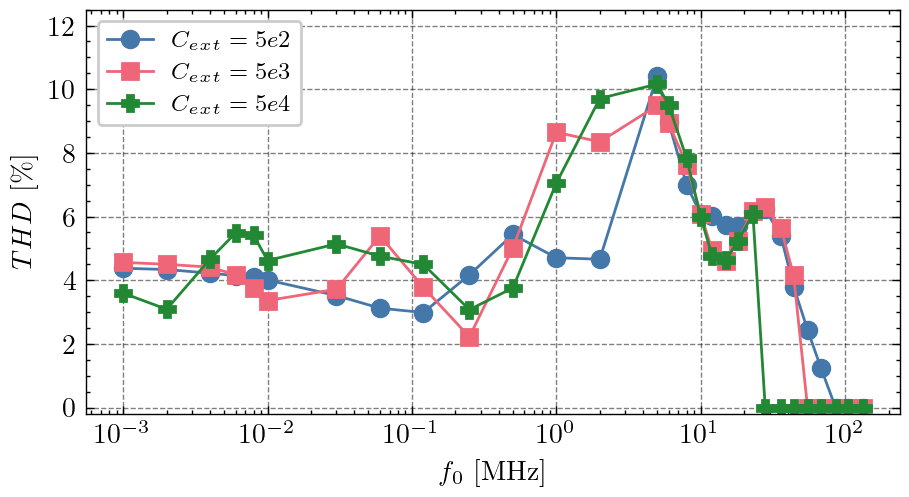

In [18]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*1.5)
ax  = fig.add_subplot()
for i, C in enumerate(C_vals):
    ax.plot(out_props[C].index, out_props[C]['THD'], label='$C_{ext} = '+C+'$', marker=ms[i])
ax.set_ylabel('$THD$ [\%]')
ax.set_xlabel('$f_0$ [MHz]')
ax.legend(fontsize='small', loc='upper left')
ax.set_xscale('log')
ax.set_ylim(-0.2,12.5)
fig.savefig("plots/thd_output_vs_freq.svg", transparent=True)

In [24]:
df = pd.DataFrame()
for i, C in enumerate(C_vals):
    df_melted       = thd_network[C].reset_index().melt(id_vars='index')
    df_melted['C']  = C
    df              = pd.concat([df,df_melted]).reset_index(drop=True)

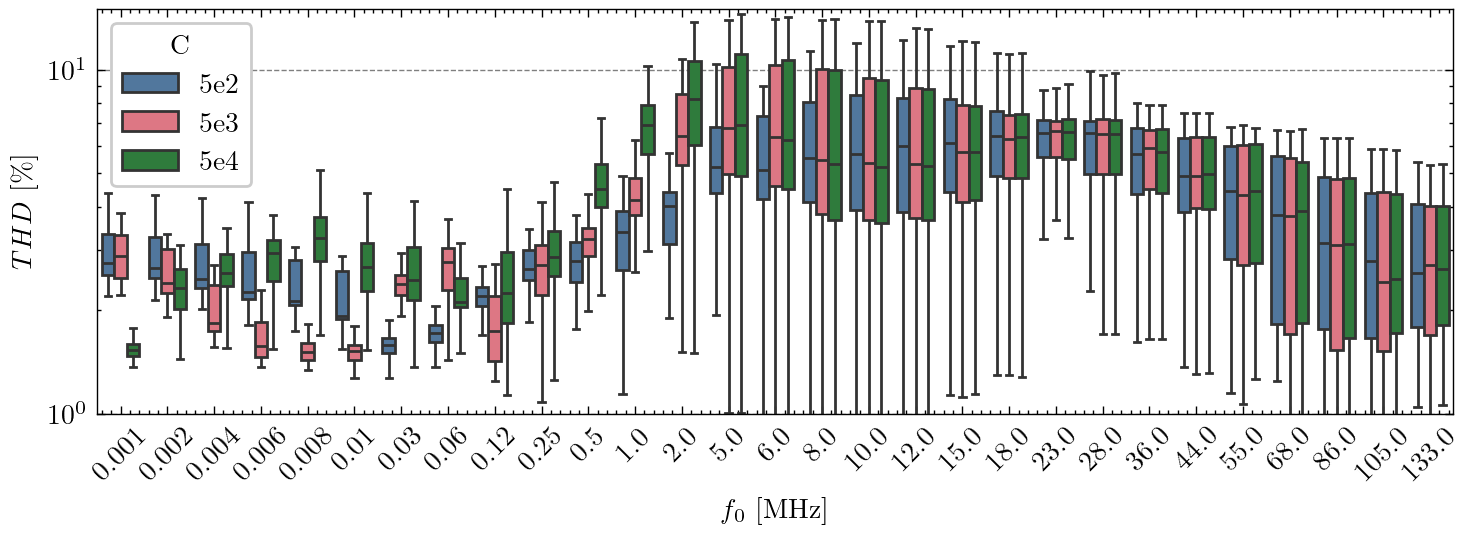

In [28]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2.5)
ax  = fig.add_subplot()
ax  = sns.boxplot(data=df, x='index', y='value', hue='C', fliersize=0)
ax.set_ylim(0,10)
ax.set_ylabel("$THD$ [\%]")
ax.set_xlabel("$f_0$ [MHz]")
ax.set_ylim(1.0,15)
ax.set_yscale('log')
_ = plt.xticks(rotation=45)
# fig.savefig("../plots/ac_input/2_electrodes/thd_dists_vs_freq.svg", transparent=True)